<a href="https://www.kaggle.com/code/donnaelson/guardians-of-the-galaxy-text-mining?scriptVersionId=92267695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Captain.America.Civil.War.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Thor.Ragnarok.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Spider-Man.Far.From.Home.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Avengers.Age.of.Ultron.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Black.Panther.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Captain.America.The.Winter.Soldier.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Avengers.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Thor.The.Dark.World.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Spider-Man.Homecoming.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Guardians.of.the.Galaxy.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Ant-Man.txt
/kaggle/input/marvel-cinematic-universe-dialogue-dataset/Ant-Man.And.The.Wasp.txt
/kaggle/input/marvel-cinema

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
 
import string

import pandas as pd
import numpy as np
from pandas import DataFrame
from nltk.stem import WordNetLemmatizer
import operator
from nltk import pos_tag 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
with open("../input/marvel-cinematic-universe-dialogue-dataset/Guardians.of.the.Galaxy.txt", "r", encoding="latin-1") as f:
    data = f.read()

In [5]:
data = data.translate(str.maketrans("","",string.punctuation))
words=data.split()
words= word_tokenize(data.lower())
stop_words= stopwords.words("english") 

words_wo_stopwords = [word for word in words if word not in stop_words]

for i in range (0,len(words)):
    try:
        if words_wo_stopwords[i] == "gon" and words_wo_stopwords [i+1] == "na":
            words_wo_stopwords[i:i +2] = ["".join(words_wo_stopwords[i:i + 2])]
    except:
        break
        

In [6]:
counter= {}

for i in words_wo_stopwords:
    if i in counter:
        counter[i] +=1
    else: counter[i] =1

In [7]:
counter_sorted = sorted(counter.items(), key=lambda x:x[1], reverse = True)
counter_sorted

[('ronan', 43),
 ('im', 41),
 ('gonna', 41),
 ('get', 41),
 ('know', 40),
 ('quill', 39),
 ('dont', 38),
 ('us', 35),
 ('like', 34),
 ('one', 34),
 ('youre', 33),
 ('got', 33),
 ('well', 30),
 ('orb', 29),
 ('yeah', 25),
 ('groot', 25),
 ('hey', 23),
 ('nova', 21),
 ('thats', 21),
 ('right', 21),
 ('man', 20),
 ('plan', 20),
 ('peter', 19),
 ('back', 19),
 ('need', 19),
 ('people', 19),
 ('would', 19),
 ('take', 18),
 ('hes', 18),
 ('something', 17),
 ('kill', 16),
 ('thanos', 16),
 ('come', 15),
 ('yondu', 15),
 ('go', 15),
 ('stone', 15),
 ('look', 14),
 ('xandar', 14),
 ('gamora', 14),
 ('aint', 13),
 ('put', 13),
 ('cant', 13),
 ('see', 13),
 ('ill', 13),
 ('corps', 12),
 ('rocket', 12),
 ('wait', 11),
 ('believe', 11),
 ('thing', 11),
 ('yes', 11),
 ('die', 11),
 ('little', 10),
 ('good', 10),
 ('theres', 10),
 ('call', 10),
 ('boy', 10),
 ('life', 10),
 ('father', 10),
 ('didnt', 10),
 ('theyre', 10),
 ('first', 10),
 ('things', 9),
 ('kree', 9),
 ('never', 9),
 ('want', 9),
 ('s

In [8]:
data_tokens = nltk.word_tokenize(data)
text1 = nltk.Text(data_tokens)


In [9]:
x = sorted([(freq, token) for token, freq in text1.vocab().items() if len(token) > 4 and freq > 15 ], key=operator.itemgetter(0), reverse=True) 
print(x)

[(43, 'Ronan'), (39, 'Quill'), (25, 'Groot'), (23, 'there'), (21, 'about'), (20, 'Youre'), (19, 'Peter'), (19, 'would'), (18, 'right'), (16, 'Thanos')]


In [10]:
df = DataFrame(x,columns=["freq", "words"])
df

,freq,words
0,43,Ronan
1,39,Quill
2,25,Groot
3,23,there
4,21,about
5,20,Youre
6,19,Peter
7,19,would
8,18,right
9,16,Thanos


In [11]:
#add part of speach tagging, e.g NNP - Proper noun, singular Phrase
df["POS Tags"]= nltk.pos_tag(df["words"])
print(df["POS Tags"])

0     (Ronan, NNP)
1     (Quill, NNP)
2     (Groot, NNP)
3      (there, EX)
4      (about, IN)
5      (Youre, NN)
6     (Peter, NNP)
7      (would, MD)
8      (right, VB)
9    (Thanos, NNP)
Name: POS Tags, dtype: object


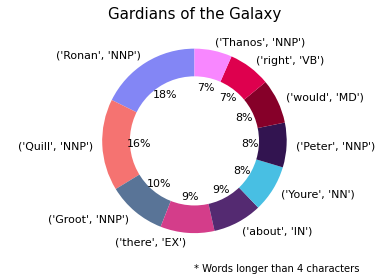

In [12]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
ax= plt.gca()
colors = ['#8386f5', '#F57371', '#597497', '#D43D8A','#542A71','#48bfe3','#321450','#860029','#de004e','#f887ff']
df.plot(kind='pie', colors=colors, y = 'freq', ax=ax, 
 startangle=90, shadow=False, autopct='%1.f%%', labels=df['POS Tags'], legend = False, fontsize=11)

centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_xlabel('* Words longer than 4 characters',horizontalalignment='left',
        verticalalignment='top',labelpad=20)
plt.ylabel('') 
ax.axis('equal') 

ax.set_title('Gardians of the Galaxy', fontsize=15, pad=21)


plt.tight_layout()
plt.show()

In [13]:
table = pd.pivot_table(data=df, index="words", values="freq").sort_index()
table

,freq
words,
Groot,25
Peter,19
Quill,39
Ronan,43
Thanos,16
Youre,20
about,21
right,18
there,23


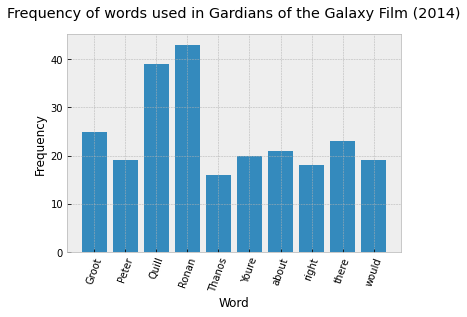

In [14]:
plt.style.use('bmh')


plt.bar(table.index,table["freq"])

plt.xticks(rotation=70)

plt.xlabel("Word")

plt.ylabel("Frequency")

plt.title('Frequency of words used in Gardians of the Galaxy Film (2014)', y=1.05) 
# y = space between title and graph

plt.show()